In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from planets_grid.planets import Planet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
testC = Planet('testC', 
                7.50, 0.23, 
                2.19, 0.07, 
                'data/146c_fine', 
                mpList=np.arange(6.7,8.4+0.1,0.1), 
                fList=([0.001, 0.002, 0.003] + list(np.arange(0.004, 0.034+0.002, 0.002))),
                orbitalList=[0.03392],
                entropyList=[7.27,7.27,7.28,7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,
                            7.32,7.32,7.32,7.33,7.33,7.34]
                )

In [23]:
print(testC.orbitalList)

[0.03392]


In [109]:
testB = Planet('testB',
               5.77, 0.18,
               2.04, 0.06,
               'data/146b_fine',
               mpList=np.arange(5.1,6.6+0.1,0.1),
               fList=np.arange(0.004,0.02+0.001,0.001),
               orbitalList=[0.02584],
               entropyList=[7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23,
                            7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26]
              )

In [25]:
print(testB.orbitalList)

[0.02584]


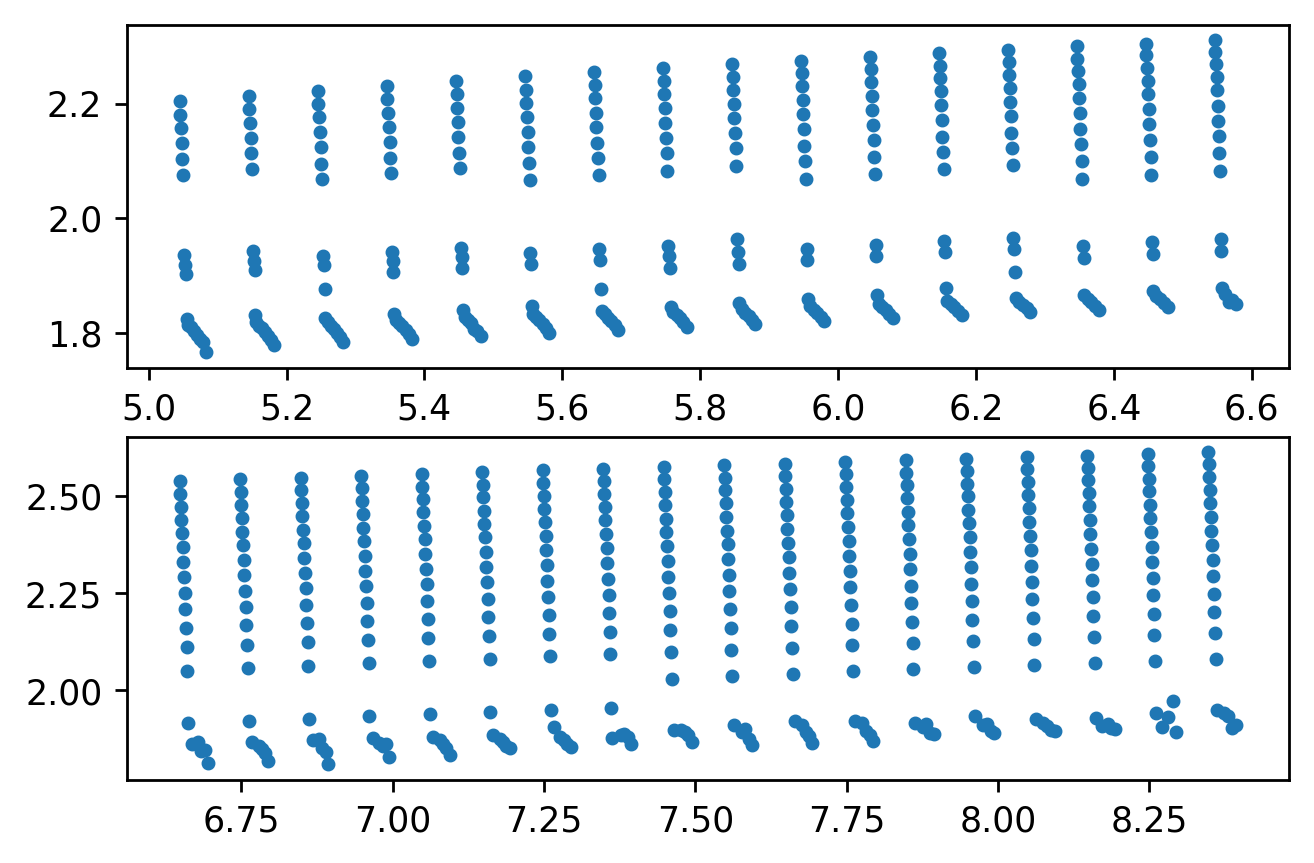

In [26]:
plt.subplot(211)
plt.plot(testB.final_masses,testB.final_radii,'.')
plt.gcf().set_dpi(250)

plt.subplot(212)
plt.plot(testC.final_masses,testC.final_radii,'.')

In [27]:
testB.final_radii.shape

(272,)

In [53]:
newage = 5.0e9
for i in range(0,len(testB.grid_ages)):
    if testB.final_ages[i] < newage:
        pass

In [29]:
print(testB.grid_ages.shape)
print(testB.final_ages.shape)

(272, 1668)
(272,)


In [113]:
#ms, rs = testB.age_interp(4.253e9)
#print(ms)
print(testB.radius_interp(5.75, 0.0041))
print(testB.mass_interp(5.75, 0.0041))

1.8179190155629872
5.730721352115474


In [84]:
5.73072134834185
1.8179189760697536

np.min(testB.mpList)

5.1

In [111]:
samples = testB.run_mcmc(5.0e9, 16)

#-7.5045868440229295

Mean acceptance fraction: 0.485
Autocorrelation time: 18.86 steps


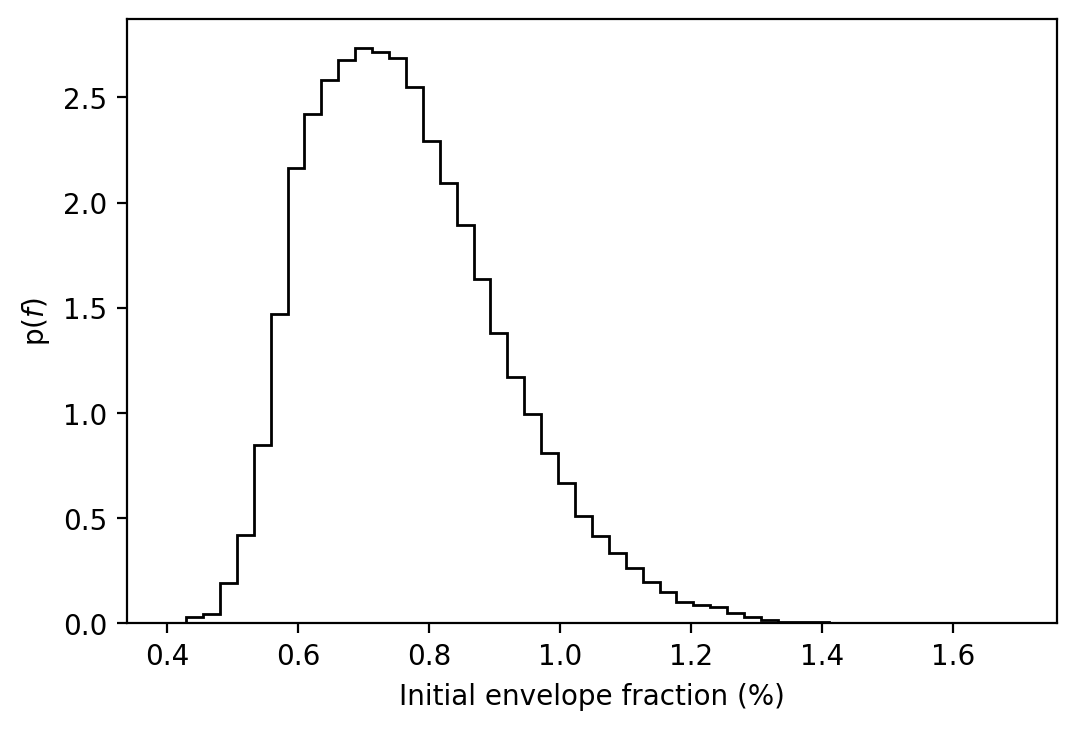

In [112]:
plt.hist(samples[:,1]*100,50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial envelope fraction (%)')
axf.set_ylabel('p($sf$)')
print()

In [114]:
samplesC = testC.run_mcmc(5.0e9, 16)

Mean acceptance fraction: 0.490
Autocorrelation time: 19.81 steps


Text(0, 0.5, 'p($m$)')

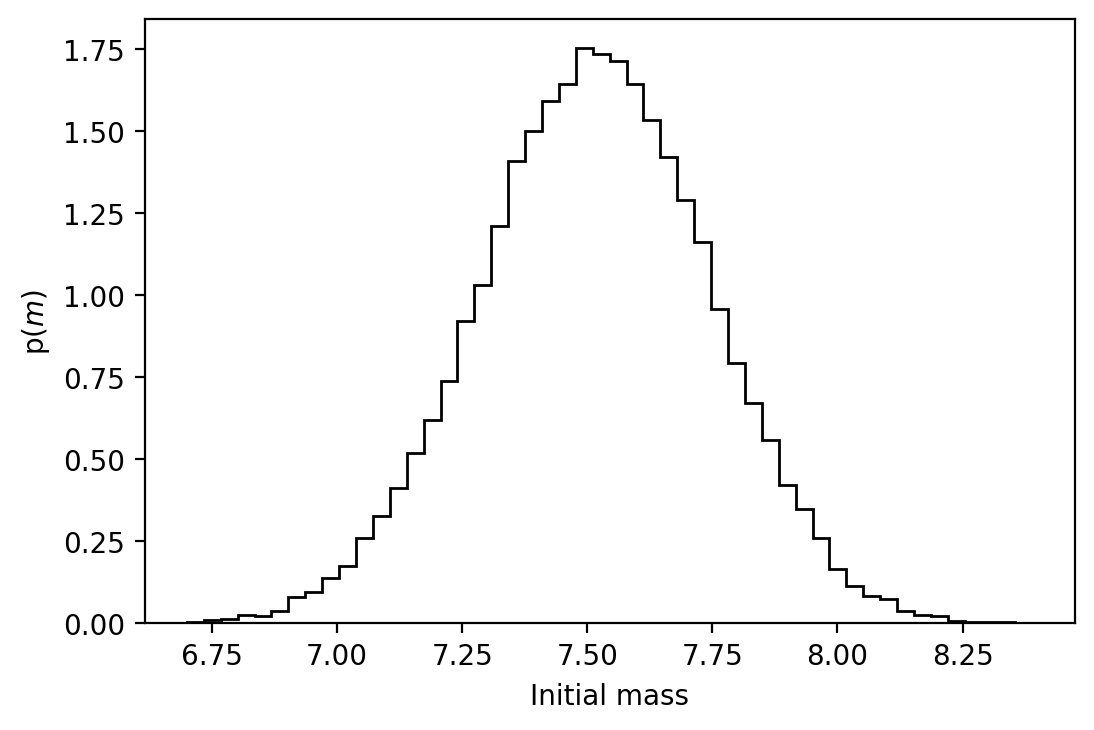

In [119]:
plt.hist(samplesC[:,0],50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
axf.set_ylabel('p($m$)')